# 🍁 Canadian Cheese & Climate Analysis
### Data Analyst Intern Assessment – Canadian Specialty Foods (CSF)
This notebook explores the relationship between cheese characteristics and average temperatures across Canadian provinces. We analyze whether environmental factors like temperature influence cheese types, moisture levels, and regional production trends.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

# Reading the csv file as 'df_cheese_cheese'
df_cheese = pd.read_csv('cheese_data.csv')
# Displaying first five rows
df_cheese.head()

,CheeseId,ManufacturerProvCode,ManufacturingTypeEn,MoisturePercent,FlavourEn,CharacteristicsEn,Organic,CategoryTypeEn,MilkTypeEn,MilkTreatmentTypeEn,RindTypeEn,CheeseName,FatLevel
0,228,NB,Farmstead,47.0,"Sharp, lactic",Uncooked,0,Firm Cheese,Ewe,Raw Milk,Washed Rind,Sieur de Duplessis (Le),lower fat
1,242,NB,Farmstead,47.9,"Sharp, lactic, lightly caramelized",Uncooked,0,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Tomme Le Champ Doré,lower fat
2,301,ON,Industrial,54.0,"Mild, tangy, and fruity","Pressed and cooked cheese, pasta filata, inter...",0,Firm Cheese,Cow,Pasteurized,NaN,Provolone Sette Fette (Tre-Stelle),lower fat
3,303,NB,Farmstead,47.0,Sharp with fruity notes and a hint of wild honey,NaN,0,Veined Cheeses,Cow,Raw Milk,NaN,Geai Bleu (Le),lower fat
4,319,NB,Farmstead,49.4,Softer taste,NaN,1,Semi-soft Cheese,Cow,Raw Milk,Washed Rind,Gamin (Le),lower fat


In [ ]:
# Displaying summary of our data
df_cheese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CheeseId              1042 non-null   int64  
 1   ManufacturerProvCode  1042 non-null   object 
 2   ManufacturingTypeEn   1042 non-null   object 
 3   MoisturePercent       1028 non-null   float64
 4   FlavourEn             801 non-null    object 
 5   CharacteristicsEn     643 non-null    object 
 6   Organic               1042 non-null   int64  
 7   CategoryTypeEn        1019 non-null   object 
 8   MilkTypeEn            1041 non-null   object 
 9   MilkTreatmentTypeEn   977 non-null    object 
 10  RindTypeEn            721 non-null    object 
 11  CheeseName            1042 non-null   object 
 12  FatLevel              1042 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 106.0+ KB


In [ ]:
# Summary statistics of df_cheese
df_cheese.describe()

,CheeseId,MoisturePercent,Organic
count,1042.000000,1028.000000,1042.000000
mean,1560.633397,47.069747,0.095010
std,451.811164,9.592647,0.293369
min,228.000000,12.000000,0.000000
25%,1280.250000,40.000000,0.000000
50%,1548.500000,46.000000,0.000000
75%,1901.750000,52.000000,0.000000
max,2391.000000,92.000000,1.000000


In [ ]:
# count all columns and rows in the dataset

print(f"Number of rows: {df_cheese.shape[0]}")
print(f"Number of columns: {df_cheese.shape[1]}")

Number of rows: 1042
Number of columns: 13


In [ ]:
# Summing null values in each column
df_cheese.isnull().sum()

,0
CheeseId,0
ManufacturerProvCode,0
ManufacturingTypeEn,0
MoisturePercent,14
FlavourEn,241
CharacteristicsEn,399
Organic,0
CategoryTypeEn,23
MilkTypeEn,1
MilkTreatmentTypeEn,65


In [ ]:
# Checking the shape
df_cheese.shape

(1042, 13)

In [ ]:
# dropping unwanted columns ManufacturingTypeEn, FlavourEn,  CharacteristicsEn, Organic, MilkTypeEn, RindTypeEn, CheeseName

cols_to_drop = ['ManufacturingTypeEn', 'FlavourEn', 'CharacteristicsEn', 'Organic', 'MilkTypeEn', 'RindTypeEn', 'CheeseName']
df_cheese = df_cheese.drop(columns=cols_to_drop)

df_cheese.head()


,CheeseId,ManufacturerProvCode,MoisturePercent,CategoryTypeEn,MilkTreatmentTypeEn,FatLevel
0,228,NB,47.0,Firm Cheese,Raw Milk,lower fat
1,242,NB,47.9,Semi-soft Cheese,Raw Milk,lower fat
2,301,ON,54.0,Firm Cheese,Pasteurized,lower fat
3,303,NB,47.0,Veined Cheeses,Raw Milk,lower fat
4,319,NB,49.4,Semi-soft Cheese,Raw Milk,lower fat


In [ ]:
# count null values now

df_cheese.isnull().sum()

,0
CheeseId,0
ManufacturerProvCode,0
MoisturePercent,14
CategoryTypeEn,23
MilkTreatmentTypeEn,65
FatLevel,0


In [ ]:
# dropping the null values

df_cheese.dropna(inplace=True)

df_cheese.isnull().sum()

,0
CheeseId,0
ManufacturerProvCode,0
MoisturePercent,0
CategoryTypeEn,0
MilkTreatmentTypeEn,0
FatLevel,0


In [ ]:
# Checking the shape again
df_cheese.shape

(956, 6)

### Data Cleaning for Wheather dataset

In [ ]:
# Reading the csv file as 'df_cheese'
df_weather = pd.read_csv('Canada_Temperature_Data.csv')
# Displaying first five rows
df_weather.head()

,Year,Month,Stn_Name,Prov,Tm,S,P
0,1917,1,COWICHAN,BC,1.3,54.6,114.7
1,1917,1,COWICHAN BAY CHERRY POINT,BC,1.3,24.1,87.7
2,1917,1,JAMES ISLAND,BC,3.3,25.3,95.8
3,1917,1,METCHOSIN,BC,2.2,46.9,156.4
4,1917,1,MILNES LANDING,BC,2.4,16.5,127.8


In [ ]:

# Displaying information about the dataframe
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357283 entries, 0 to 1357282
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Year      1357283 non-null  int64  
 1   Month     1357283 non-null  int64  
 2   Stn_Name  1357283 non-null  object 
 3   Prov      1357283 non-null  object 
 4   Tm        1357283 non-null  float64
 5   S         1357283 non-null  float64
 6   P         1357283 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 72.5+ MB


In [ ]:
# Checking for null values
df_weather.isnull().sum()

,0
Year,0
Month,0
Stn_Name,0
Prov,0
Tm,0
S,0
P,0


In [ ]:
# Displaying the shape of the dataframe
print(df_weather.shape)


(1357283, 7)


In [ ]:
# check the datatype for every column
df_weather.dtypes

,0
Year,int64
Month,int64
Stn_Name,object
Prov,object
Tm,float64
S,float64
P,object


In [ ]:
# finding mode for temperature that is Tm column based on Prov
mode_Tm_by_Prov_df = df_weather.groupby('Prov')['Tm'].mean().reset_index(name='Avg_Tm')

mode_Tm_by_Prov_df

,Prov,Avg_Tm
0,AB,4.443528
1,BC,6.848785
2,MB,1.996501
3,NB,4.743894
4,NL,3.661499
5,NS,6.374093
6,NT,-6.434340
7,NU,-12.455522
8,ON,5.689031
9,PE,5.594824


In [ ]:
# prompt: change ManufacturerProvCode column name to Prov in df_cheese dataframe

df_cheese = df_cheese.rename(columns={'ManufacturerProvCode': 'Prov'})
df_cheese.head()

,CheeseId,Prov,MoisturePercent,CategoryTypeEn,MilkTreatmentTypeEn,FatLevel
0,228,NB,47.0,Firm Cheese,Raw Milk,lower fat
1,242,NB,47.9,Semi-soft Cheese,Raw Milk,lower fat
2,301,ON,54.0,Firm Cheese,Pasteurized,lower fat
3,303,NB,47.0,Veined Cheeses,Raw Milk,lower fat
4,319,NB,49.4,Semi-soft Cheese,Raw Milk,lower fat


In [ ]:
# Get the unique values from the 'Prov' column in df_cheese
unique_prov_cheese = df_cheese['Prov'].unique()
mode_Tm_by_Prov_df['Prov'] = mode_Tm_by_Prov_df['Prov'].str.strip().str.upper()
# Filter df_weather to keep only rows where the 'Prov' value is in unique_prov_cheese
mode_Tm_by_Prov_df = mode_Tm_by_Prov_df[mode_Tm_by_Prov_df['Prov'].isin(unique_prov_cheese)]

# Display the first few rows of the filtered df_weather to verify
mode_Tm_by_Prov_df.head()


,Prov,Avg_Tm
0,AB,4.443528
1,BC,6.848785
2,MB,1.996501
3,NB,4.743894
4,NL,3.661499


In [ ]:
# Display the unique 'Prov' values in the filtered df_weather to verify
df_cheese['Prov'].unique()

array(['NB', 'ON', 'BC', 'AB', 'NS', 'MB', 'NL', 'PE', 'QC', 'SK'],
      dtype=object)

In [ ]:
# Display the unique 'Prov' values in the wheather dataset
mode_Tm_by_Prov_df['Prov'].unique()

array(['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'ON', 'PE', 'QC', 'SK'],
      dtype=object)

In [ ]:
df_cheese['Prov'] = df_cheese['Prov'].str.strip().str.upper()


In [ ]:
# Merging cheese and weather data using 'inner' method
df_merged = pd.merge(df_cheese, mode_Tm_by_Prov_df, on='Prov', how='inner')
df_merged.tail(5)

,CheeseId,Prov,MoisturePercent,CategoryTypeEn,MilkTreatmentTypeEn,FatLevel,Avg_Tm
951,2387,NS,37.0,Hard Cheese,Pasteurized,higher fat,6.374093
952,2388,AB,46.0,Fresh Cheese,Pasteurized,lower fat,4.443528
953,2389,NS,40.0,Veined Cheeses,Thermised,higher fat,6.374093
954,2390,NS,34.0,Semi-soft Cheese,Thermised,higher fat,6.374093
955,2391,AB,31.5,Fresh Cheese,Pasteurized,higher fat,4.443528


## Scatter Plot – Moisture % vs. Avg Temperature

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Group the dataset by Province (Prov) and calculate the mean of MoisturePercent and Avg_Tm for each province
moisture_temp = df_merged.groupby('Prov')[['MoisturePercent', 'Avg_Tm']].mean().reset_index()

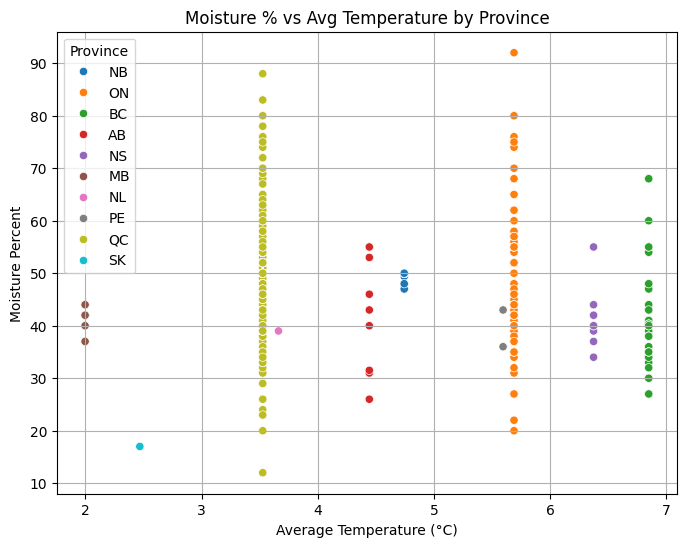

In [ ]:
# Set the size of the plot to 8 inches wide by 6 inches tall
plt.figure(figsize=(8,6))

# Create a scatter plot:
# - x-axis: 'Avg_Tm' (Average Temperature)
# - y-axis: 'MoisturePercent' (Cheese Moisture)
# - hue: Different colors for each province
sns.scatterplot(data=df_merged, x='Avg_Tm', y='MoisturePercent', hue='Prov')

# Add a title to the plot
plt.title('Moisture % vs Avg Temperature by Province')

# Label the x-axis
plt.xlabel('Average Temperature (°C)')

# Label the y-axis
plt.ylabel('Moisture Percent')

# Add a legend with the title 'Province' to distinguish data points by color
plt.legend(title='Province')

# Show a grid in the background to make the chart easier to read
plt.grid(True)

# Display the completed plot
plt.show()

## 🧠 Inference & Discussion
1.	No Strong Linear Trend



*   Moisture values are spread out across all temperature ranges.
*   There is no clear increasing or decreasing pattern between Avg_Tm and MoisturePercent.

2.	High Moisture Exists at Various Temperatures


*   Even provinces with low temperatures (e.g., 3–4°C) have cheeses with high moisture (>70%).
*   Provinces with higher average temperatures (e.g., 6–7°C) also show a wide range of moisture values.

3.	Moisture Depends on Other Factors


*   Since moisture levels don’t align with temperature changes clearly, cheese moisture is likely more influenced by other factors like:
*   Cheese type (e.g., Fresh, Hard)
*   Fat level




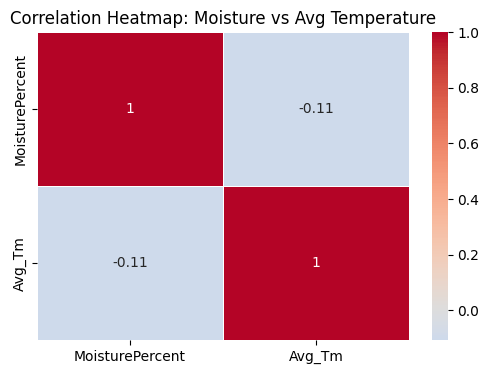

In [ ]:

# Select only numeric columns
numeric_cols = df_merged[['MoisturePercent', 'Avg_Tm']]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap: Moisture vs Avg Temperature')
plt.show()

✅ Conclusion:

📉 Temperature does not significantly affect cheese moisture content in our data.
This suggests that other factors (like cheese type, processing method, or fat level) likely play a much bigger role in determining moisture.